In [1]:
# Импорт библиотек 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
from sklearn import decomposition
from sklearn import datasets 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

%matplotlib inline



### Ирисы Фишера

Ирисы Фишера — это набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном.Этот набор данных стал уже классическим, и часто используется в литературе для иллюстрации работы различных статистических алгоритмов.

In [2]:
# Импортируем ирисы Фишера

iris = datasets.load_iris()
X = iris.data
y = iris.target

Визуализируем данные в трехмерном пространстве


[Text(0.0, 0, ''),
 Text(1.0, 0, ''),
 Text(2.0, 0, ''),
 Text(3.0, 0, ''),
 Text(4.0, 0, ''),
 Text(5.0, 0, ''),
 Text(6.0, 0, ''),
 Text(7.0, 0, ''),
 Text(8.0, 0, '')]

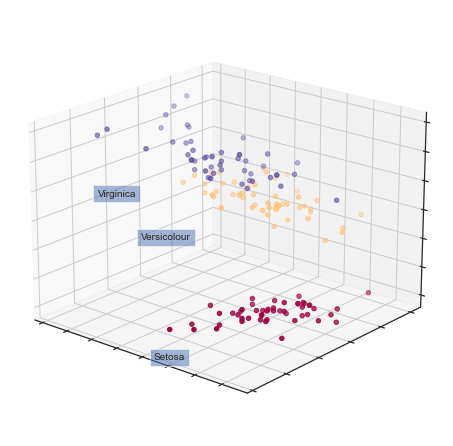

In [3]:

fig = plt.figure(1,figsize = (8,6))
plt.clf() 
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=20, azim=130)  # fig - "материнская фигура"; rect - расположение осей (left, bottom, width, height); elev - угол обзора (высота); azim - угол обзора (по горизонтали (азимут))

plt.cla()

for name, label in [('Setosa',0),('Versicolour',1),('Virginica',2)]:  # Строим box
    ax.text3D(X[y == label,0].mean(),
              X[y == label,1].mean() + 1.5,
              X[y == label,2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha= .5, edgecolor='w',facecolor='b'))
    
y_clr = np.choose(y,[1,2,4]).astype(np.float) # Задаем цвета точек


ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, cmap=cm.get_cmap("Spectral")) # "Закидываем точки в наш box"


ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

## PCA

Метод главных компонент (англ. principal component analysis, PCA) — один из основных способов уменьшить размерность данных, потеряв наименьшее количество информации. 

Задача анализа главных компонент имеет, как минимум, четыре базовые версии:

    • Аппроксимировать данные линейными многообразиями меньшей размерности;
    • Найти подпространства меньшей размерности, в ортогональной проекции на которые разброс данных (то есть среднеквадратичное отклонение от среднего значения) максимален;
    • Найти подпространства меньшей размерности, в ортогональной проекции на которые среднеквадратичное расстояние между точками максимально;
    • Для данной многомерной случайной величины построить такое ортогональное преобразование координат, в результате которого корреляции между отдельными координатами обратятся в нуль



In [4]:
# Сравним какие ответы нам даст один и тот же алгоритм ML с PCA (Principal Component Analysis) и без


# Импортируем алгоритм ML, известный как "Дерево решений"

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score


In [5]:

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .3, stratify=y, random_state=42)

Для примера возьмём неглубокое дерево решений


In [6]:
clf = DecisionTreeClassifier(max_depth=2,random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.3f}'.format(
                                accuracy_score(y_test,preds.argmax(axis=1))
))

Accuracy: 0.889


Используя PCA уменьшим размерность данных и визуализируем их 

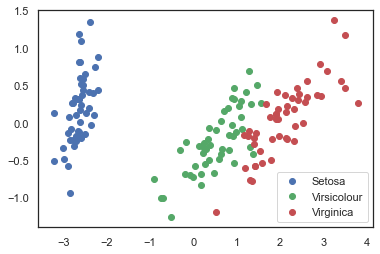

In [7]:
pca = decomposition.PCA(n_components=2)
X_centered = X-X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

# Визуализируем полученные данные

plt.plot(X_pca[y==0,0], X_pca[y==0,1], 'bo', label='Setosa')
plt.plot(X_pca[y==1,0], X_pca[y==1,1], 'go', label='Virsicolour')
plt.plot(X_pca[y==2,0], X_pca[y==2,1], 'ro', label='Virginica')

plt.legend(loc=0)

In [9]:

X_train, X_test, y_train, y_test = train_test_split(X_pca,y, test_size= .3, stratify=y, random_state=42)

clf = DecisionTreeClassifier(max_depth=2,random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.3f}'.format(
                                accuracy_score(y_test,preds.argmax(axis=1))
))



Accuracy: 0.911


## MNIST

База данных MNIST (сокращение от «Modified National Institute of Standards and Technology») — объёмная база данных образцов рукописного написания цифр.

In [10]:
digits = datasets.load_digits()
X = digits.data
y = digits.target


# Сразу проведем валидацию данных

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= .3, stratify=y, random_state=42)



Визуализируем данные


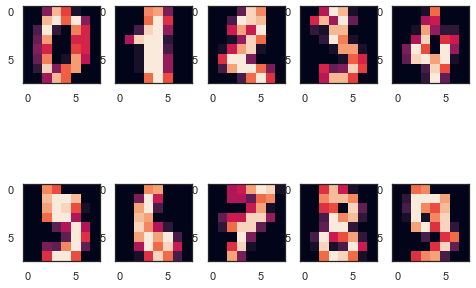

In [11]:
plt.figure(figsize=(8,6))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(X[i,:].reshape([8,8]))

In [12]:

list(X[0].shape)[0] # размерность признакового пространства - 64

64

Уменьшим размерность до двух

In [13]:
# уменьшим до двух

pca = decomposition.PCA(n_components=2) 
X_reduced = pca.fit_transform(X)


Визуализируем

Text(0.5, 1.0, 'MNIST')

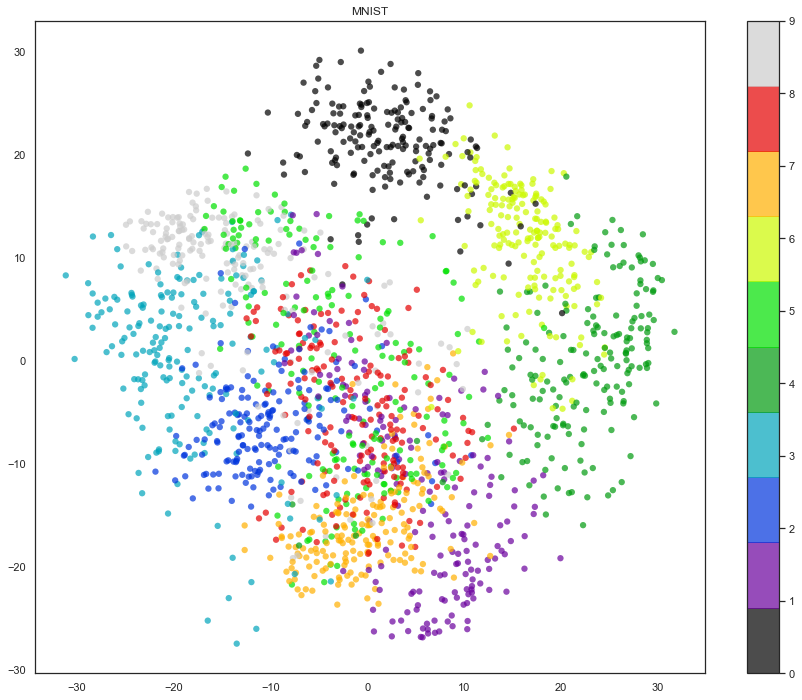

In [14]:
plt.figure(figsize=(15,12)) 
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, 
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.title('MNIST')

## t-SNE

Стохастическое вложение соседей с t-распределением (англ. t-distributed Stochastic Neighbor Embedding, t-SNE) — это алгоритм машинного обучения для визуализации, разработанный Лоренсом ван дер Маатеном и Джеффри Хинтоном. Он является техникой нелинейного снижения размерности, хорошо подходящей для вложения данных высокой размерности для визуализации в пространство низкой размерности (двух- или трехмерное). В частности, метод моделирует каждый объект высокой размерности двух- или трёхмерной точкой таким образом, что похожие объекты моделируются близко расположенными точками, а непохожие точки моделируются с большой вероятностью точками, далеко друг от друга отстоящими.



In [15]:
# Используем стохастическое вложение соседей с t-распределением (t-SNE) для дальнейшего понижения размерности данных

from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)
X_tsne = tsne.fit_transform(X)

Text(0.5, 1.0, 'MNIST after TSNE')

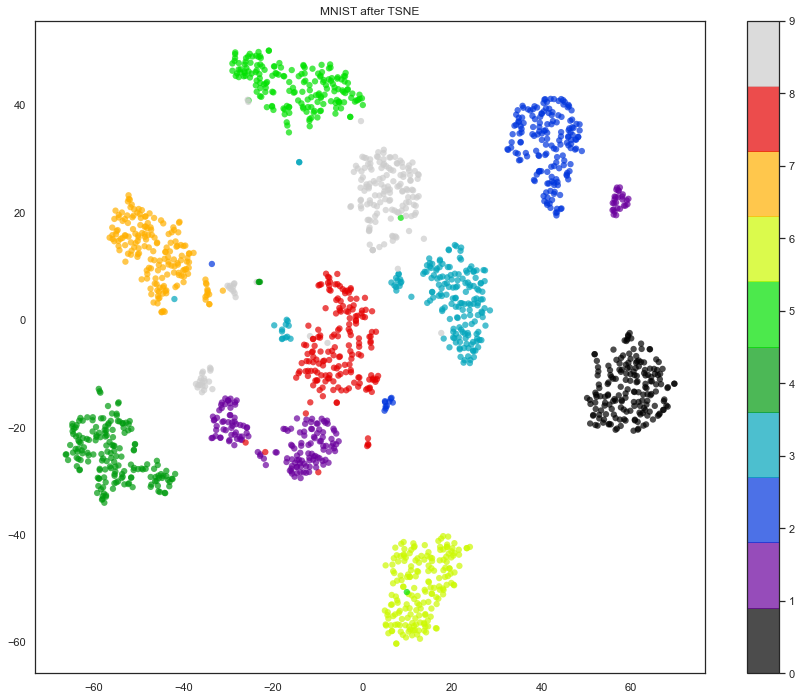

In [16]:

plt.figure(figsize=(15,12))
plt.scatter(X_tsne[:,0], X_tsne[:,1],c=y,
            edgecolor='none',alpha=0.7,s=40,
            cmap=plt.get_cmap('nipy_spectral',10))
plt.colorbar()
plt.title('MNIST after TSNE')

На практике, как правило, выбирают столько главных компонент, чтобы оставить 90% дисперсии исходных данных. В данном случае для этого достаточно выделить 20-21 главную компоненту, то есть снизить размерность с 64 признаков до 21

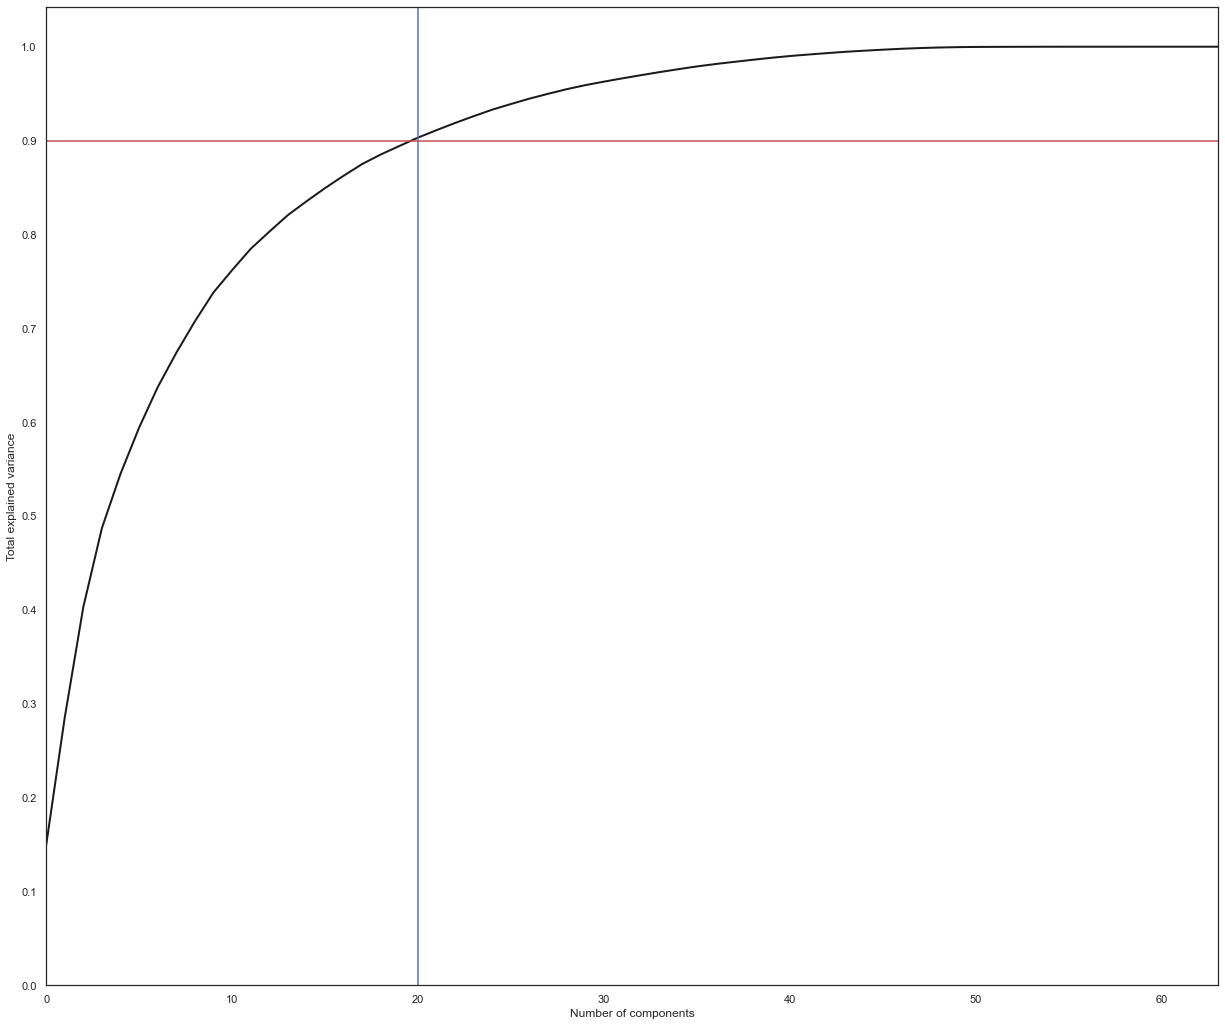

In [17]:
pca = decomposition.PCA().fit(X)

dispersion = 0.9
n_component = 20

plt.figure(figsize=(21,18))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Number of components')
plt.ylabel('Total explained variance')
plt.xlim(0, 63)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(n_component, c='b')
plt.axhline(dispersion, c='r')
plt.show();


## Метод "локтя" 
#### (elbow method)

При кластеризации методом k-средних количество кластеров чаще всего оценивают с помощью «метода локтя». Он подразумевает многократное циклическое исполнение алгоритма с увеличением количества выбираемых кластеров, а также последующим откладыванием на графике балла кластеризации, вычисленного как функция от количества кластеров.


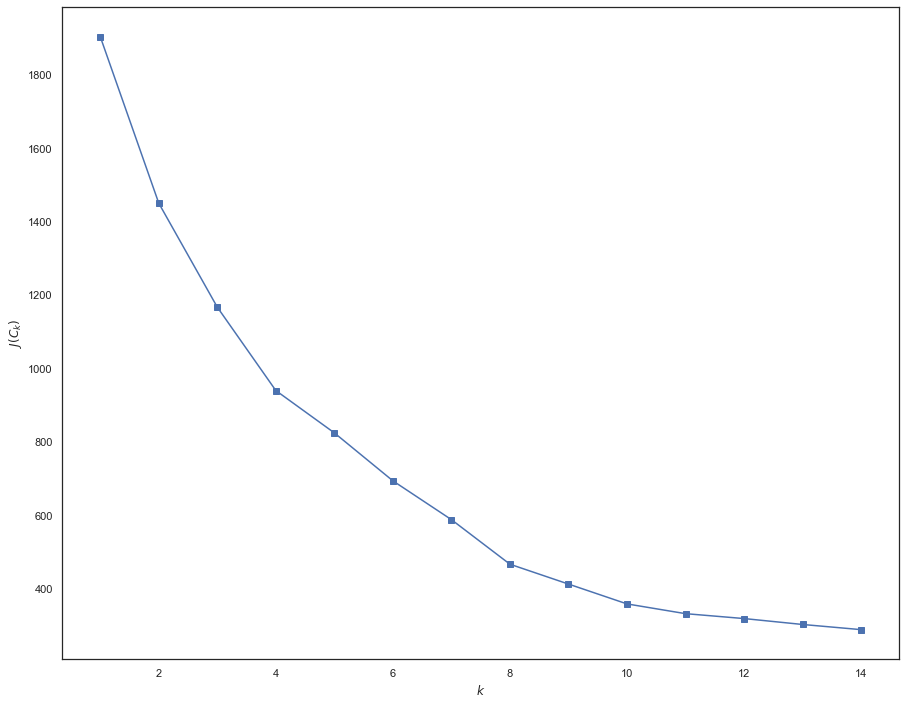

In [18]:
from sklearn.cluster import KMeans

plt.figure(figsize=(15,12))
inertia = []
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k,init='k-means++', random_state=42).fit(X_tsne)
    inertia.append(np.sqrt(kmeans.inertia_))

plt.plot(range(1, 15), inertia, marker='s');
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$');

# По методу "локтя" разбить лучше всего на 8 кластеров, но мы знаем, что у нас тут их 10, поэтому выберем все равно 10

## K-means

Используем алгоритм K-means для кластеризации данных. Алгоритм работае по следующему сценарию:
1.	Рандомно закидывает N-ое количество центройд (N - количество кластеров, которые мы задаем вручную) и высчитывает расстояние между каждой центройдой и каждой точкой (евклидово расстояние). 
2.	K-means делает калибровку:  считает место для новой центройды и переносит её туда. 
3.	Ещё раз пересчитывает расстояние, ибо одни точки могут перейти в другой кластер и повторяет пункт 2. Если точки уже принадлежат «нужным» кластерам, то работа алгоритма прекращается


In [19]:
# 

kmeans = KMeans(n_clusters =10, init='k-means++',random_state=42)
y_kmeans = kmeans.fit_predict(X_tsne)

Визуализируем

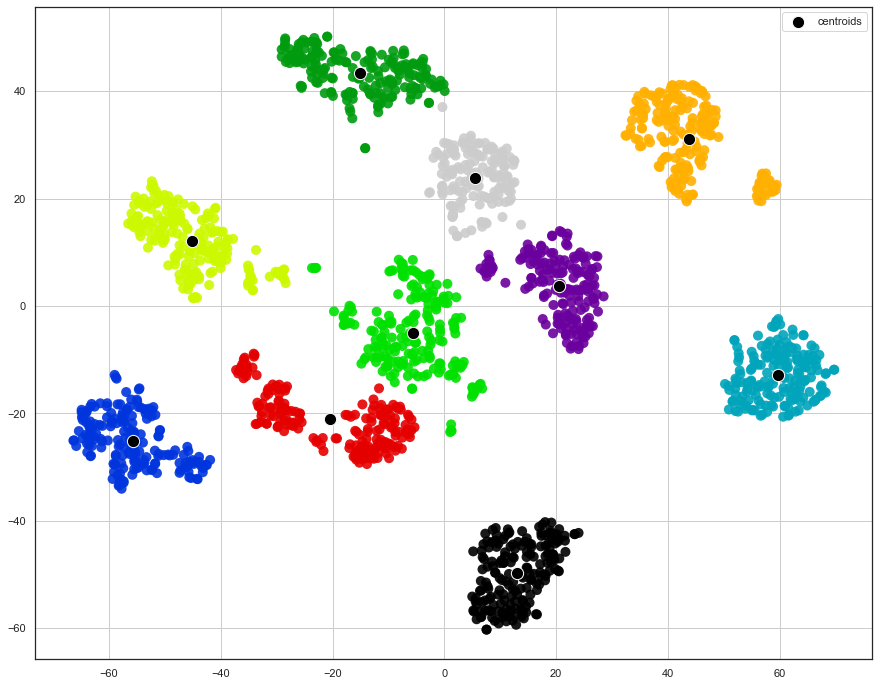

In [20]:
plt.figure(figsize=(15,12))

plt.scatter(X_tsne[:,0], X_tsne[:,1],c=y_kmeans,
            edgecolor='none',alpha=0.9,s=100,
            cmap=plt.get_cmap('nipy_spectral',10))



plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    s = 150,
    c = '#000000',
    label = 'centroids',
    edgecolor = 'w'
        )

plt.legend(loc=0)
plt.grid()
plt.show()

## Агломеративная кластеризация

Наверное самый простой и понятный алгоритм кластеризации без фиксированного числа кластеров — агломеративная кластеризация. Интуиция у алгоритма очень простая:

1. Начинаем с того, что высыпаем на каждую точку свой кластер
2. Сортируем попарные расстояния между центрами кластеров по возрастанию
3. Берём пару ближайших кластеров, склеиваем их в один и пересчитываем центр кластера
4. Повторяем п. 2 и 3 до тех пор, пока все данные не склеятся в один кластер

In [21]:
# Создадим рандомный набор данных 

from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist

X = np.zeros((150,2))

np.random.seed(seed=42)
X[:50,0] = np.random.normal(loc=0.0, scale = 0.3, size=50)
X[:50,1] = np.random.normal(loc=0.0, scale = 0.3, size=50)

X[50:100,0] = np.random.normal(loc=2.0, scale = 0.5, size=50)
X[50:100,1] = np.random.normal(loc=-1.0, scale = 0.2, size=50)

In [22]:

X[100:150,0] = np.random.normal(loc=-1.0, scale = 0.2, size=50)
X[100:150,1] = np.random.normal(loc=2.0, scale = 0.5, size=50)

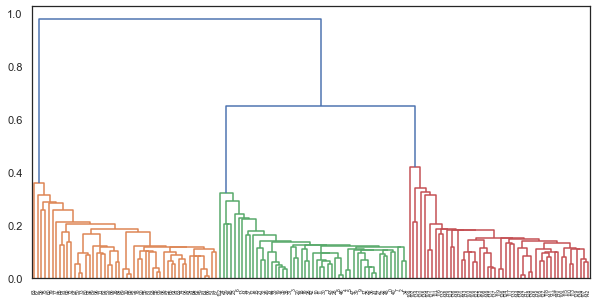

In [23]:
distance_mat = pdist(X) # pdist посчитает нам верхний треугольник матрицы попарных расстояний

Hier = hierarchy.linkage(distance_mat, 'single') # linkage — реализация агломеративного алгоритма

plt.figure(figsize=(10, 5))
dn = hierarchy.dendrogram(Hier, color_threshold=0.5)


# Метрики качества кластеризации

Задача оценки качества кластеризации является более сложной по сравнению с оценкой качества классификации. Во-первых, такие оценки не должны зависеть от самих значений меток, а только от самого разбиения выборки. Во-вторых, не всегда известны истинные метки объектов, поэтому также нужны оценки, позволяющие оценить качество кластеризации, используя только неразмеченную выборку.


Выделяют внешние и внутренние метрики качества. Внешние используют информацию об истинном разбиении на кластеры, в то время как внутренние метрики не используют никакой внешней информации и оценивают качество кластеризации, основываясь только на наборе данных. Оптимальное число кластеров обычно определяют с использованием внутренних метрик

### Adjusted Rand Index (ARI)

Предполагается, что известны истинные метки объектов. Данная мера не зависит от самих значений меток, а только от разбиения выборки на кластеры.

Rand Index (RI) выражает схожесть двух разных кластеризаций одной и той же выборки. Чтобы этот индекс давал значения близкие к нулю для случайных кластеризаций при любом $n$ и числе кластеров, необходимо нормировать его.

Эта мера симметрична, не зависит от значений и перестановок меток. Таким образом, данный индекс является мерой расстояния между различными разбиениями выборки. $\text{ARI}$ принимает значения в диапазоне $[-1, 1]$. Отрицательные значения соответствуют "независимым" разбиениям на кластеры, значения, близкие к нулю, — случайным разбиениям, и положительные значения говорят о том, что два разбиения схожи (совпадают при $\text{ARI} = 1$)

### Adjusted Mutual Information (AMI)

Данная мера очень похожа на $\text{ARI}$. Она также симметрична, не зависит от значений и перестановок меток. Определяется с использованием функции энтропии, интерпретируя разбиения выборки, как дискретные распределения (вероятность отнесения к кластеру равна доле объектов в нём). Индекс $MI$ определяется как взаимная информация для двух распределений, соответствующих разбиениям выборки на кластеры. Интуитивно, взаимная информация измеряет долю информации, общей для обоих разбиений: насколько информация об одном из них уменьшает неопределенность относительно другого.


Аналогично $\text{ARI}$ определяется индекс $\text{AMI}$, позволяющий избавиться от роста индекса $MI$ с увеличением числа классов. Он принимает значения в диапазоне $[0, 1]$. Значения, близкие к нулю, говорят о независимости разбиений, а близкие к единице – об их схожести (совпадении при $\text{AMI} = 1$)

### Гомогенность, полнота, V-мера

Формально данные меры также определяются с использованием функций энтропии и условной энтропии, рассматривая разбиения выборки как дискретные распределения

Где $h$ измеряет, насколько каждый кластер состоит из объектов одного класса, а $c$ — насколько объекты одного класса относятся к одному кластеру. Эти меры не являются симметричными. Обе величины принимают значения в диапазоне $[0, 1]$, и большие значения соответствуют более точной кластеризации. Эти меры не являются нормализованными, как $\text{ARI}$ или $\text{AMI}$, и поэтому зависят от числа кластеров. Случайная кластеризация не будет давать нулевые показатели при большом числе классов и малом числе объектов. В этих случаях предпочтительнее использовать $\text{ARI}$. Однако при числе объектов более 1000 и числе кластеров менее 10 данная проблема не так явно выражена и может быть проигнорирована.

### Силуэт

В отличие от описанных выше метрик, данный коэффициент не предполагает знания истинных меток объектов, и позволяет оценить качество кластеризации, используя только саму (неразмеченную) выборку и результат кластеризации. Сначала силуэт определяется отдельно для каждого объекта. Обозначим через $a$ — среднее расстояние от данного объекта до объектов из того же кластера, через $b$ — среднее расстояние от данного объекта до объектов из ближайшего кластера (отличного от того, в котором лежит сам объект).

Силуэтом выборки называется средняя величина силуэта объектов данной выборки. Таким образом, силуэт показывает, насколько среднее расстояние до объектов своего кластера отличается от среднего расстояния до объектов других кластеров. Данная величина лежит в диапазоне $[-1, 1]$. Значения, близкие к -1, соответствуют плохим (разрозненным) кластеризациям, значения, близкие к нулю, говорят о том, что кластеры пересекаются и накладываются друг на друга, значения, близкие к 1, соответствуют "плотным" четко выделенным кластерам. Таким образом, чем больше силуэт, тем более четко выделены кластеры, и они представляют собой компактные, плотно сгруппированные облака точек.
С помощью силуэта можно выбирать оптимальное число кластеров $k$ (если оно заранее неизвестно) — выбирается число кластеров, максимизирующее значение силуэта. В отличие от предыдущих метрик, силуэт зависит от формы кластеров, и достигает больших значений на более выпуклых кластерах, получаемых с помощью алгоритмов, основанных на восстановлении плотности распределения.



######  Посмотрим на эти метрики для наших алгоритмов, запущенных на данных рукописных цифр MNIST:



In [24]:
from sklearn import metrics
from sklearn import datasets
import pandas as pd
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation, SpectralClustering

data = datasets.load_digits()
X, y = data.data, data.target

algorithms = []
algorithms.append(KMeans(n_clusters=10, random_state=42))
algorithms.append(SpectralClustering(n_clusters=10, random_state=42,
                                     affinity='nearest_neighbors'))



algorithms.append(AffinityPropagation())
algorithms.append(AgglomerativeClustering(n_clusters=10))

data = []
for algo in algorithms:
    algo.fit(X)
    data.append(({
        'ARI': metrics.adjusted_rand_score(y, algo.labels_),
        'AMI': metrics.adjusted_mutual_info_score(y, algo.labels_),
        'Homogenity': metrics.homogeneity_score(y, algo.labels_),
        'Completeness': metrics.completeness_score(y, algo.labels_),
        'V-measure': metrics.v_measure_score(y, algo.labels_),
        'Silhouette': metrics.silhouette_score(X, algo.labels_)
    }))

results = pd.DataFrame(data=data, columns=['ARI', 'AMI', 'Homogenity', 'Completeness', 'V-measure','Silhouette'],
                                  index=['K-means', 'Affinity', 'Spectral', 'Agglomerative'])

results



C:\Users\1\anaconda3\lib\site-packages\sklearn\cluster\_affinity_propagation.py:146: FutureWarning: 'random_state' has been introduced in 0.23. It will be set to None starting from 0.25 which means that results will differ at every function call. Set 'random_state' to None to silence this warning, or to 0 to keep the behavior of versions <0.23.
  warnings.warn(("'random_state' has been introduced in 0.23. "


,ARI,AMI,Homogenity,Completeness,V-measure,Silhouette
K-means,0.666622,0.740907,0.739158,0.747875,0.743491,0.182418
Affinity,0.756461,0.852040,0.831691,0.876614,0.853562,0.182729
Spectral,0.175174,0.612460,0.958907,0.486901,0.645857,0.115197
Agglomerative,0.794003,0.866832,0.857513,0.879096,0.868170,0.178497
